**Realizado por**: José Javier Díaz González

**Correo**: alu0101128894@ull.edu.es

# Problema de flujo máximo a coste mínimo (Shortest Path Problem)

Resolvamos el problema de calcular el camino de costo mínimo del nodo $s=0$ al nodo $t=n-1$ en un grafo dirigido con costos positivos:

In [25]:
!pip install --upgrade pip

  Using cached pip-22.3.1-py3-none-any.whl (2.1 MB)


ERROR: To modify pip, please run the following command:
C:\Users\Kephril\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
!pip install matplotlib


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


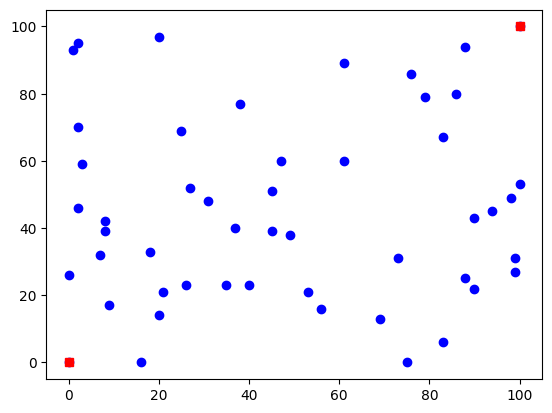

In [23]:
n        = 50
nodes = range(n)
s = 0    # source
t = n-1  # target

import random
random.seed(5)
# Gerenamos aleatoriamente n puntos en el plano
points   = [(random.randint(0,100),random.randint(0,100)) for i in nodes]
# Para una mejor visialización ponemos en la esquina inferior izquierda s y en la superior derecha
points[0]=[0,0]
points[n-1]=[100,100]

# Definemos una función para dibujar puntos y arcos
import matplotlib.pyplot as plt
def dibuja(selected):
    plt.plot([p[0] for p in points], [p[1] for p in points], 'bo')
    for (i,j) in selected:
        plt.plot([points[i][0],points[j][0]], [points[i][1],points[j][1]], 'g-')
    plt.plot(points[s][0],points[s][1], 'rs')
    plt.plot(points[t][0],points[t][1], 'rs')

dibuja({})


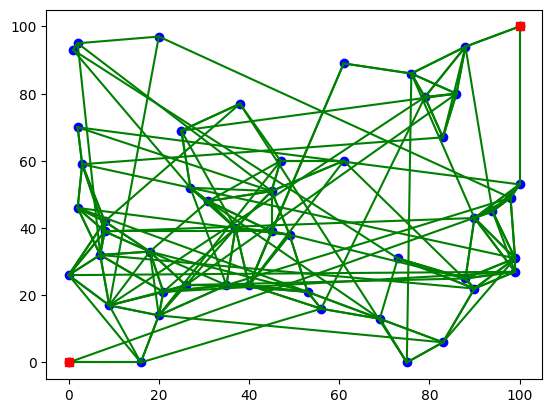

In [22]:
import math
import numpy as np
cost =  np.zeros((n,n))
cap = np.zeros((n,n))
# Matriz de costos
# Igual a la distancia por una cantidad aleatoria (en [1.0 , 1.2]) y una cantidad muy grande cuando está lejos
for i in nodes :
  for j in nodes:
    if j != i:
      dx = points[i][0] - points[j][0]
      dy = points[i][1] - points[j][1]
      dist = math.floor(math.sqrt(dx*dx + dy*dy)*random.uniform(1.0, 1.2))
      if dist > 20 and j != i + 1 :
        cost[i,j]= 1000
        cap[i,j] = 0  # Si la distancia es mayor a 20, la capacidad de transporte (cap) es 0, es decir, no se puede transportar nada.
      else :
        cost[i,j] = dist 
        cap[i,j] = random.randint(5,20) # Generamos un número aleatorio entre 5 y 20 como capacidad máximo que se puede transportar.
        
selected = [(i,j) for i in nodes for j in nodes if cost[i,j] < 200]
dibuja(selected)


In [21]:
!pip install ortools
from ortools.linear_solver import pywraplp


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Costo total =  1.0  in  0.075 seconds
Optimal path: [(0, 1), (1, 48), (2, 18), (18, 19), (19, 20), (20, 0), (48, 49), (49, 2)]


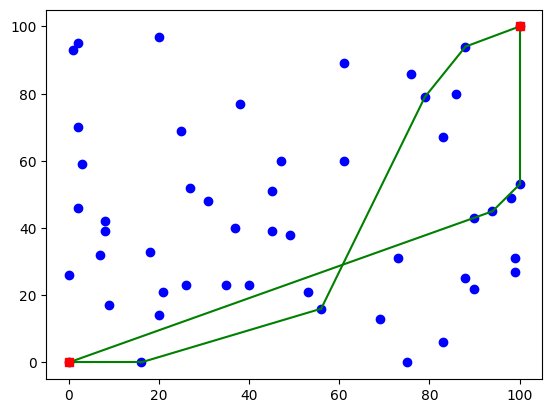

In [20]:
solver = pywraplp.Solver('Flujo máximo', pywraplp.Solver.CBC_MIXED_INTEGER_PROGRAMMING)
infinity = 9999999
x = { (i,j) : solver.BoolVar('x[%i, %i]' % (i, j)) for i in nodes for j in nodes }
y = { i : solver.BoolVar('y[%i]' % i) for i in nodes }
z = solver.IntVar(0.0, infinity, 'z')
            
# solver.Minimize( solver.Sum(cost[i,j] * x[i,j] for i in nodes for j in nodes if i!=j ) )
solver.Maximize(z)

solver.Add(solver.Sum(x[s,j] for j in nodes if j!=s ) == z)
#solver.Add(solver.Sum(x[i,s] for i in nodes if i!=s ) == 0)
solver.Add(solver.Sum(x[i,t] for i in nodes if i!=t ) == z)
#solver.Add(solver.Sum(x[t,j] for j in nodes if j!=t ) == 0)

#[ solver.Add(solver.Sum(x[i,j] for j in nodes if j!=i) == y[i]) for i in nodes if i!=s and i!=t ]
#[ solver.Add(solver.Sum(x[i,j] for i in nodes if j!=i) == y[j]) for j in nodes if j!=s and j!=t ]

# El flujo que sale de un nodo i debe ser igual al que entra a ese mismo nodo i:
[ solver.Add(solver.Sum(x[i,j] for j in nodes if j!=i) == solver.Sum(x[j,i] for j in nodes if j!=i)) for i in nodes if i!=s or i!=t]
# El flujo que sale de un nodo no puede superar la capacidad máximo de ese nodo
[ solver.Add( x[i,j] <= cap[i,j]) for j in nodes for i in nodes]
    
solver.Solve()

print('Costo total = ', solver.Objective().Value()," in ", solver.WallTime()/1000, "seconds")    
selected = [(i,j) for i in nodes for j in nodes if x[i,j].solution_value() > 0.5]
print('Optimal path: %s' % str(selected))

#for i in nodes:     ## Bucle para imprimir los costes del camino
  #for j in nodes:
    #if x[i,j] >= 
      #print('Costos:')
dibuja(selected)

Lo positivo es que este lenguaje permite usar fácilmente muchas librerías de optimización (comerciales o gratuitas). Lo negativo es que no permite funciones avanzadas de ninguna librería, sino sólo las funciones genéricas comunes a todas.